# Cross Validation With Multiple Algorithms


We will use credit card default data from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: Download Data

In [162]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: default.csv


In [163]:
data = pd.read_csv(data_location)
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
21778,21779,220000,2,2,2,25,0,0,0,0,...,31807,33966,33288,1479,1820,1600,2688,0,1500,1
21565,21566,50000,2,3,2,23,0,0,0,0,...,34243,28014,28528,2000,1700,1502,1000,1200,1200,0
18553,18554,50000,2,1,2,25,0,0,2,0,...,43127,44210,45844,4000,0,2000,1800,2500,5500,1
22097,22098,200000,2,1,2,29,1,-1,0,0,...,1675,97,138,928,1000,1000,97,138,0,0
25715,25716,110000,2,2,1,35,0,0,0,0,...,84257,84762,86139,1500,1706,55000,3200,3300,3300,0
15849,15850,110000,2,1,1,28,0,0,0,0,...,106828,84729,82910,11602,4238,4316,11190,0,3000,0
9682,9683,130000,2,2,2,23,0,0,0,0,...,58470,59069,51599,3000,3000,3000,2500,2000,3000,0
17895,17896,20000,1,1,2,28,0,0,0,0,...,9907,9627,11500,2000,3000,2500,0,2000,5,0
26598,26599,160000,1,1,2,25,1,-1,2,2,...,0,0,0,10139,0,0,0,0,0,1
9376,9377,450000,2,1,1,69,-1,-1,-1,-1,...,0,6265,2374,0,1173,0,6265,2374,708,1


## Step-2: EDA

In [164]:
## Check data skew
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [165]:
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

## Step-3: Clean up 

TODO

In [166]:
#data.isnull().sum().sort_values(ascending=False).head()
#no zero 

## Step-4: Shape data

In [167]:
label_col = 'default'

feature_columns = data.columns
## TODO : drop 'ID' and 'default' columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)

In [168]:
X = data[feature_columns]
y = data[[label_col]]

print (X.shape)
print (y.shape)


(30000, 23)
(30000, 1)


## Step-5: Cross Validation

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose models, we want to compare
## TODO: Here are we are choosing 'default' models
## What if we choose the 'best of' for each model
## See 'hyper-1' notebook for how to get the best model :-) 

models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
#models.append(('NB', GaussianNB()))


results1 = []
results2 = []
names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']
y2 = np.ravel(y)
for name, model in models:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(model, X, y2, cv=5, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    this_result1 = cv_results['test_accuracy']
    this_result2 = cv_results['test_roc_auc']
    results1.append(this_result1)
    results2.append(this_result2)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result1), np.median(this_result1), np.std(this_result1), this_result1))
    print("\n{}: ROC AUC : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result2), np.median(this_result2), np.std(this_result2), this_result2))


=========  LR  =========
{'fit_time': array([0.35639501, 0.35440087, 0.3720789 , 0.34443688, 0.30449915]),
 'score_time': array([0.00696588, 0.0066309 , 0.00677204, 0.00708914, 0.00720501]),
 'test_accuracy': array([0.7785    , 0.77883333, 0.77883333, 0.77883333, 0.77883333]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.61366839, 0.63233762, 0.66267504, 0.65995947, 0.65128403])}

LR: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.7785     0.77883333 0.77883333 0.77883333 0.77883333]

LR: ROC AUC : avg=0.64, median=0.65,  std=0.02,  cv_results=[0.61366839 0.63233762 0.66267504 0.65995947 0.65128403]

=========  KNN  =========
{'fit_time': array([0.01321816, 0.004107  , 0.00406909, 0.00395799, 0.00395703]),
 'score_time': array([8.22267079, 7.34145999, 8.623142  , 8.7252233 , 8.64381623]),
 'test_accuracy': array([0.7495    , 0.74966667, 0.752     , 0.76133333

## Step-6: Vizualize Results

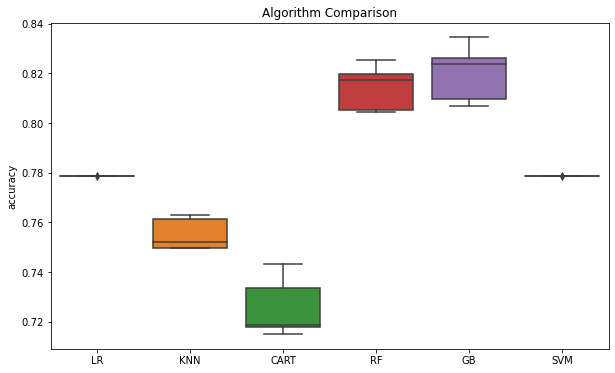

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results1)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()

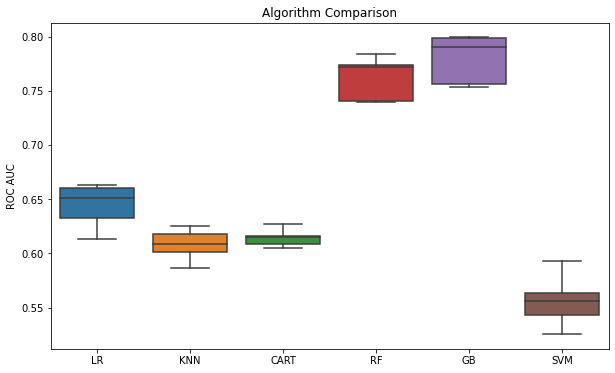

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results2) 
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('ROC AUC')
plt.show()

## Step-7: Performance Improvement

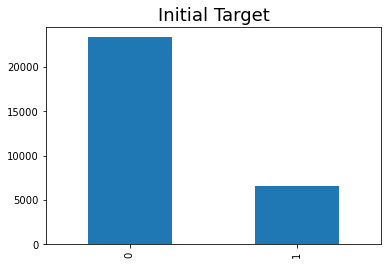

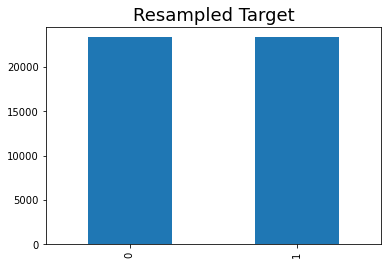

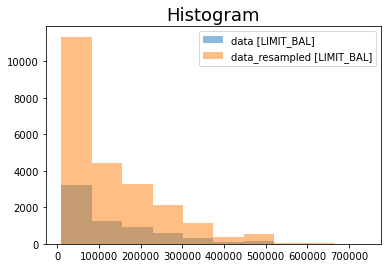

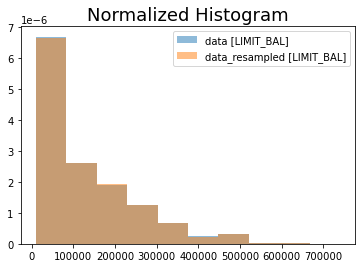

In [172]:
#####################################################################################################
# How can we improve the output performance (e.g. accuracy, F1, roc_auc, etc) given imbalanced data?
#
# Keyword: resampling the data!  
#
# Either oversample the minority class [RandomOverSampler from the imblearn package]
# or undersample the majority class    [RandomUnderSampler from the imblearn package]
# to balance the dataset. 
#
# In this case, I use RandomOverSampler to oversample the minority class (target = 1)
#####################################################################################################

import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=10)
X_resampled, y_resampled = ros.fit_resample(X, y)

data_resampled = pd.concat([X_resampled,y_resampled], axis = 1)

###############################################
# Visualized y target before and after resample
###############################################
data['default'].value_counts().sort_index().plot(kind='bar')
plt.title('Initial Target', fontsize=18)
plt.show()

data_resampled['default'].value_counts().sort_index().plot(kind='bar')
plt.title('Resampled Target', fontsize=18)
plt.show()

########################################################
# Visualized 1st feature of X before and after resample
########################################################

data_=data.drop('ID', axis=1)

# Plot histogram of first feature of X
plt.hist(data_[data_['default']==1].iloc[:,0], alpha=0.5, label='data ['+ data_.columns[0]+']')

# Plot histogram of first feature of X_resampled
plt.hist(data_resampled[data_resampled['default']==1].iloc[:,0], alpha=0.5, label='data_resampled ['+ data_.columns[0]+']')
plt.title('Histogram', fontsize=18)
plt.legend()
plt.show()

plt.hist(data_[data_['default']==1].iloc[:, 0], alpha=0.5, label='data ['+ data_.columns[0]+']', density=True)
plt.hist(data_resampled[data_resampled['default']==1].iloc[:, 0], alpha=0.5, label='data_resampled ['+ data_.columns[0]+']', density=True)
plt.title('Normalized Histogram', fontsize=18)
plt.legend()
plt.show()

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose models, we want to compare
## TODO: Here are we are choosing 'default' models
## What if we choose the 'best of' for each model
## See 'hyper-1' notebook for how to get the best model :-) 

models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
#models.append(('NB', GaussianNB()))


results3 = []
results4 = []
names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']

y2 = np.ravel(y_resampled.copy())
X = X_resampled.copy()


for name, model in models:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(model, X, y2, cv=5, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    this_result3 = cv_results['test_accuracy']
    this_result4 = cv_results['test_roc_auc']
    results3.append(this_result3)
    results4.append(this_result4)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result3), np.median(this_result3), np.std(this_result3), this_result3))
    print("\n{}: ROC AUC : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result4), np.median(this_result4), np.std(this_result4), this_result4))


=========  LR  =========
{'fit_time': array([0.35821295, 0.33972096, 0.40290928, 0.41839528, 0.41370487]),
 'score_time': array([0.01759505, 0.010957  , 0.01217365, 0.01110601, 0.00957799]),
 'test_accuracy': array([0.60721164, 0.60121977, 0.59479991, 0.63338684, 0.62557517]),
 'test_f1': array([0.65028103, 0.64125517, 0.64053156, 0.66339163, 0.66006024]),
 'test_precision': array([0.58602335, 0.58275017, 0.57557148, 0.61326067, 0.60434086]),
 'test_recall': array([0.73036593, 0.71281832, 0.72202012, 0.72244811, 0.7270976 ]),
 'test_roc_auc': array([0.6461782 , 0.64025491, 0.63483828, 0.67855892, 0.66479783])}

LR: accuracy : avg=0.61, median=0.61,  std=0.01,  cv_results=[0.60721164 0.60121977 0.59479991 0.63338684 0.62557517]

LR: ROC AUC : avg=0.65, median=0.65,  std=0.02,  cv_results=[0.6461782  0.64025491 0.63483828 0.67855892 0.66479783]

=========  KNN  =========
{'fit_time': array([0.00511312, 0.00529194, 0.00531507, 0.00494099, 0.01375794]),
 'score_time': array([16.515975  , 

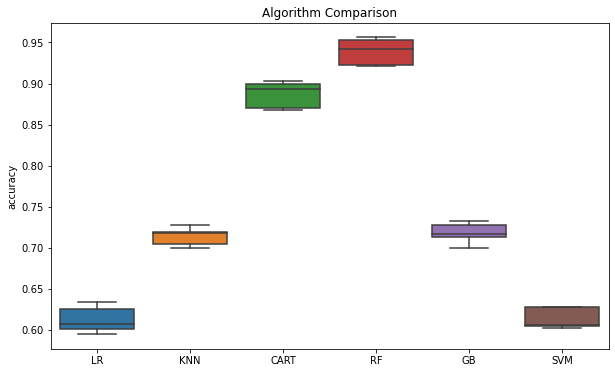

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results3) 
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()

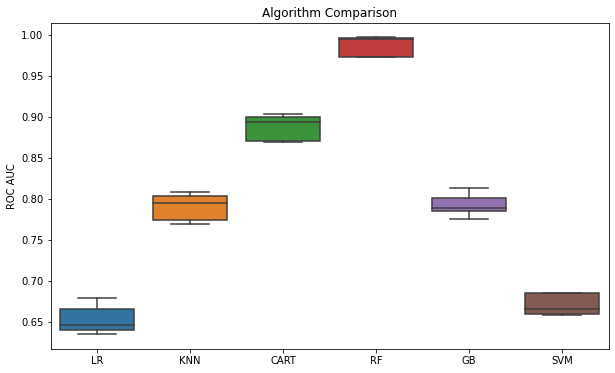

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results4) 
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('ROC AUC')
plt.show()

In [184]:
#end